In [2]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [21]:
api = wandb.Api()
sweep = api.sweep("daniel-xiao/02_on_policy_eval/bh1brioy")
runs = sweep.runs

for run in runs:
    history = run.history(samples=10000)["estimate"].to_list()
    
ground_truth = history[-1]
ground_truth

0.8056000000000003

In [34]:
mc = history[:1000]
mc_errors = [abs(x - ground_truth) for x in mc]

In [30]:
api = wandb.Api()
sweep = api.sweep("daniel-xiao/03_bpg_eval/s1jroh8k")
runs = sweep.runs

for run in runs:
    estimates = run.history(samples=1000)["estimate"].to_list()

errors = [abs(x - ground_truth) for x in estimates]

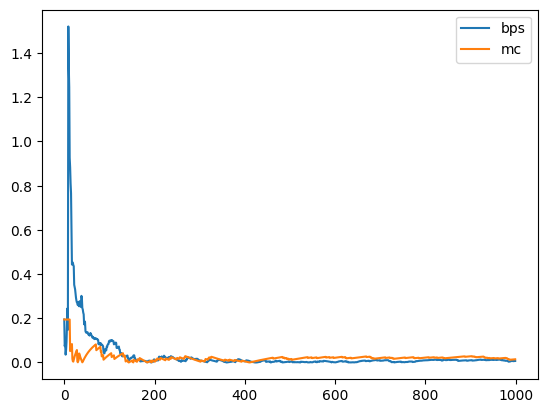

In [37]:
plt.plot([x for x in range(1000)], errors, label="bps")
plt.plot([x for x in range(1000)], mc_errors, label="mc")
plt.legend()
plt.show()